In [2]:
!pip install transformers
!pip install pytorch_pretrained_bert
!pip install BertModel
!pip install sentencepiece
!pip install awscli --ignore-installed six
!pip install tools
import os
import json
import gzip
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import datetime
import nltk
import tensorflow as tf
from urllib.request import urlopen
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from collections import Counter
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras import regularizers
from keras.constraints import unit_norm
from multiprocessing import Pool, cpu_count
from tools import *
pd.set_option('display.max_colwidth', None)
nltk.download('stopwords')
#from google.colab import drive
#drive.mount('/content/gdrive')

import torch
from torch.nn import Module, Embedding
from transformers import BertTokenizer, RobertaTokenizer, BertForMaskedLM, RobertaForMaskedLM, GPT2Tokenizer, TFBertModel

  Using cached botocore-1.21.65-py3-none-any.whl (8.0 MB)
  Attempting uninstall: botocore
    Found existing installation: botocore 1.23.19
    Uninstalling botocore-1.23.19:
      Successfully uninstalled botocore-1.23.19


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 1.22.19 requires botocore==1.23.19, but you have botocore 1.21.65 which is incompatible.
awscli 1.22.19 requires colorama<0.4.4,>=0.2.5, but you have colorama 0.4.4 which is incompatible.
awscli 1.22.19 requires docutils<0.16,>=0.10, but you have docutils 0.17 which is incompatible.
ERROR: Could not find a version that satisfies the requirement BertModel
ERROR: No matching distribution found for BertModel


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\adity\\anaconda3\\Lib\\site-packages\\yaml\\_yaml.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Using cached awscli-1.22.19-py3-none-any.whl (3.8 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached rsa-4.7.2-py3-none-any.whl (34 kB)
  Using cached s3transfer-0.5.0-py3-none-any.whl (79 kB)
  Using cached botocore-1.23.19-py3-none-any.whl (8.4 MB)
  Using cached docutils-0.15.2-py3-none-any.whl (547 kB)
  Using cached colorama-0.4.3-py2.py3-none-any.whl (15 kB)
  Using cached PyYAML-5.4.1-cp38-cp38-win_amd64.whl (213 kB)
  Using cached jmespath-0.10.0-py2.py3-none-any.whl (24 kB)
  Using cached urllib3-1.26.7-py2.py3-none-any.whl (138 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import logging
tf.get_logger().setLevel(logging.ERROR)
tf.config.list_physical_devices('GPU')
tf.__version__

'2.3.0'

In [4]:
import tensorboard
tensorboard.__version__

'2.5.0'

In [112]:
import requests
!curl -O http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/All_Amazon_Review_5.json.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 23.5G    0 5536k    0     0  5713k      0  1:11:59 --:--:--  1:11:59 5713k
  0 23.5G    0 17.3M    0     0  9028k      0  0:45:33  0:00:01  0:45:32 9028k
  0 23.5G    0 29.6M    0     0   9.9M      0  0:40:14  0:00:02  0:40:12  9.9M
  0 23.5G    0 41.6M    0     0  10.5M      0  0:38:14  0:00:03  0:38:11 10.5M
  0 23.5G    0 54.5M    0     0  10.9M      0  0:36:38  0:00:04  0:36:34 10.9M
  0 23.5G    0 66.0M    0     0  11.0M      0  0:36:22  0:00:05  0:36:17 12.1M
  0 23.5G    0 78.8M    0     0  11.3M      0  0:35:29  0:00:06  0:35:23 12.3M
  0 23.5G    0 91.4M    0     0  11.4M      0  0:35:02  0:00:07  0:34:55 12.3M
  0 23.5G    0  104M    0     0  11.6M      0  0:34:36  0:00:08  0:34:28 12.4M
  0 23.5G    0  116M    0     0  11.6M      0  0:34

  6 23.5G    6 1497M    0     0  12.9M      0  0:31:06  0:01:55  0:29:11 13.2M
  6 23.5G    6 1510M    0     0  12.9M      0  0:31:05  0:01:56  0:29:09 13.2M
  6 23.5G    6 1524M    0     0  12.9M      0  0:31:05  0:01:57  0:29:08 13.3M
  6 23.5G    6 1537M    0     0  12.9M      0  0:31:05  0:01:58  0:29:07 13.2M
  6 23.5G    6 1550M    0     0  12.9M      0  0:31:04  0:01:59  0:29:05 13.2M
  6 23.5G    6 1563M    0     0  12.9M      0  0:31:05  0:02:00  0:29:05 13.0M
  6 23.5G    6 1576M    0     0  12.9M      0  0:31:04  0:02:01  0:29:03 13.0M
  6 23.5G    6 1589M    0     0  12.9M      0  0:31:04  0:02:02  0:29:02 13.0M
  6 23.5G    6 1602M    0     0  12.9M      0  0:31:04  0:02:03  0:29:01 13.0M
  6 23.5G    6 1615M    0     0  12.9M      0  0:31:04  0:02:04  0:29:00 13.0M
  6 23.5G    6 1628M    0     0  12.9M      0  0:31:04  0:02:05  0:28:59 12.9M
  6 23.5G    6 1641M    0     0  12.9M      0  0:31:04  0:02:06  0:28:58 13.0M
  6 23.5G    6 1654M    0     0  12.9M      0  0:31:

 18 23.5G   18 4459M    0     0  12.9M      0  0:31:04  0:05:44  0:25:20 12.9M
 18 23.5G   18 4472M    0     0  12.9M      0  0:31:04  0:05:45  0:25:19 13.0M
 18 23.5G   18 4485M    0     0  12.9M      0  0:31:04  0:05:46  0:25:18 13.2M
 18 23.5G   18 4499M    0     0  12.9M      0  0:31:03  0:05:47  0:25:16 13.1M
 18 23.5G   18 4512M    0     0  12.9M      0  0:31:03  0:05:48  0:25:15 13.1M
 18 23.5G   18 4525M    0     0  12.9M      0  0:31:03  0:05:49  0:25:14 13.2M
 18 23.5G   18 4539M    0     0  12.9M      0  0:31:03  0:05:50  0:25:13 13.3M
 18 23.5G   18 4552M    0     0  12.9M      0  0:31:03  0:05:51  0:25:12 13.2M
 18 23.5G   18 4565M    0     0  12.9M      0  0:31:03  0:05:52  0:25:11 13.3M
 18 23.5G   18 4578M    0     0  12.9M      0  0:31:03  0:05:53  0:25:10 13.3M
 19 23.5G   19 4592M    0     0  12.9M      0  0:31:02  0:05:54  0:25:08 13.2M
 19 23.5G   19 4605M    0     0  12.9M      0  0:31:02  0:05:55  0:25:07 13.3M
 19 23.5G   19 4618M    0     0  12.9M      0  0:31:

 93 23.5G   93 21.9G    0     0  12.6M      0  0:31:45  0:29:33  0:02:12 12.9M
 93 23.5G   93 21.9G    0     0  12.6M      0  0:31:45  0:29:34  0:02:11 13.1M
 93 23.5G   93 21.9G    0     0  12.6M      0  0:31:45  0:29:35  0:02:10 13.3M
 93 23.5G   93 21.9G    0     0  12.6M      0  0:31:44  0:29:36  0:02:08 13.3M
 93 23.5G   93 21.9G    0     0  12.6M      0  0:31:44  0:29:37  0:02:07 13.3M
 93 23.5G   93 21.9G    0     0  12.6M      0  0:31:44  0:29:38  0:02:06 13.3M
 93 23.5G   93 21.9G    0     0  12.6M      0  0:31:44  0:29:39  0:02:05 13.3M
 93 23.5G   93 22.0G    0     0  12.6M      0  0:31:44  0:29:40  0:02:04 13.3M
 93 23.5G   93 22.0G    0     0  12.6M      0  0:31:44  0:29:41  0:02:03 13.4M
 93 23.5G   93 22.0G    0     0  12.6M      0  0:31:44  0:29:42  0:02:02 13.4M
 93 23.5G   93 22.0G    0     0  12.6M      0  0:31:44  0:29:43  0:02:01 13.4M
 93 23.5G   93 22.0G    0     0  12.6M      0  0:31:44  0:29:44  0:02:00 13.4M
 93 23.5G   93 22.0G    0     0  12.6M      0  0:31:

In [113]:
balanced_data = []
with gzip.open('All_Amazon_Review_5.json.gz') as f:
    pos_limit = 500000
    neg_limit = 500000
    for l in f:
        #Using first 1M records. All records used up all the RAM. 
        if pos_limit == 0 and neg_limit == 0:
          break
        json_data = json.loads(l.strip())
        overall = json_data['overall']
        if overall < 4.0 and neg_limit > 0: 
          balanced_data.append(json_data)
          neg_limit -= 1
        elif overall >= 4.0 and pos_limit > 0:
          balanced_data.append(json_data)
          pos_limit -= 1

In [114]:
balanced_df = pd.DataFrame.from_dict(balanced_data)
b_sentiment_df = pd.concat([balanced_df['unixReviewTime'], balanced_df['reviewText'], balanced_df['overall']], axis=1)
b_sentiment_df['sentiment'] = np.where(b_sentiment_df['overall'] < 4.0, 0, 1)
b_sentiment_df['datetimeReviewTime'] = pd.to_datetime(b_sentiment_df['unixReviewTime'], unit='s')
# b_sentiment_df = b_sentiment_df.set_index(['datetimeReviewTime'])
b_sentiment_df['reviewText'] = np.where(pd.isnull(b_sentiment_df['reviewText']), b_sentiment_df['reviewText'], b_sentiment_df['reviewText'].astype(str))

In [115]:
b_sentiment_df['Original_text'] = b_sentiment_df['reviewText']

In [116]:
b_sentiment_df.head()

,unixReviewTime,reviewText,overall,sentiment,datetimeReviewTime,Original_text
0,1449273600,Can only control one of two bulbs from one of two echos,2.0,0,2015-12-05,Can only control one of two bulbs from one of two echos
1,1515974400,Great skill,5.0,1,2018-01-15,Great skill
2,1515024000,Not happy. Can not connect to Alexa regardless.,1.0,0,2018-01-04,Not happy. Can not connect to Alexa regardless.
3,1514592000,Can not connect a hue lights to Alexa. Linked the LIFX in the Amazon Alexa app. Can not located the smart hue bulbs. It should not be this hard to connect to Alexa. Even watched a you tube video and still,1.0,0,2017-12-30,Can not connect a hue lights to Alexa. Linked the LIFX in the Amazon Alexa app. Can not located the smart hue bulbs. It should not be this hard to connect to Alexa. Even watched a you tube video and still
4,1514505600,"The service works with google home, but doesn't work with alexa. I'm getting rid of the ""I'm not sure"" machine.",1.0,0,2017-12-29,"The service works with google home, but doesn't work with alexa. I'm getting rid of the ""I'm not sure"" machine."


In [117]:
balanced_df['Original_text'] = balanced_df['reviewText']

## Basic EDA

In [118]:
balanced_df.shape

(1000000, 13)

In [119]:
balanced_df.head(3)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,Original_text
0,2.0,False,"12 5, 2015",A3KUPJ396OQF78,B017O9P72A,Larry Russlin,Can only control one of two bulbs from one of two echos,Buggy,1449273600,NaN,NaN,NaN,Can only control one of two bulbs from one of two echos
1,5.0,False,"01 15, 2018",A3TXR8GLKS19RE,B017O9P72A,Nello,Great skill,Great,1515974400,NaN,NaN,NaN,Great skill
2,1.0,False,"01 4, 2018",A1FOHYK23FJ6CN,B017O9P72A,L. Ray Humphreys,Not happy. Can not connect to Alexa regardless.,Can not connect to ECHO,1515024000,2,NaN,NaN,Not happy. Can not connect to Alexa regardless.


In [120]:
import copy
req_df =b_sentiment_df
req_df['reviewText'] = copy.deepcopy(b_sentiment_df['reviewText'])
#calculate word count

req_df['words'] = [len(str(x).split()) for x in req_df['reviewText'].tolist()]
word_count = req_df['words']
avg_word_count = sum(word_count) / len(word_count)
print("Average words in a sentence is : ", avg_word_count)

Average words in a sentence is :  53.235652


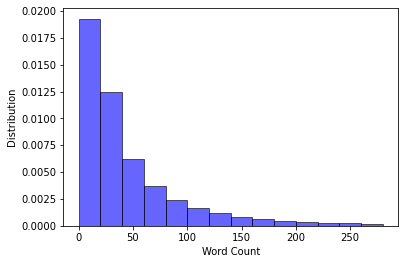

In [121]:
import math
# fixed bin size
bins=range(0,300,20) # fixed number of bins 
plt.ylabel("Distribution")
plt.xlabel("Word Count")
plt.hist(word_count, bins=bins, density=True, alpha=0.6, color='b', edgecolor='black')

plt.show()

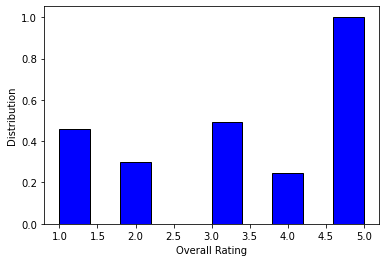

In [122]:
import math

Label_overall = req_df['overall']
plt.ylabel("Distribution")
plt.xlabel("Overall Rating")
plt.hist(Label_overall, density=True, color='b', edgecolor='black')

plt.show()

In [123]:
import numpy as np
import scipy.stats as st
#Calculate the sample parameters
confidenceLevel = 0.99   # 95% CI given
degrees_freedom = len(word_count)-1  #degree of freedom = sample size-1
sampleMean = np.mean(word_count)    #sample mean
sampleStandardError = st.sem(word_count)  #sample standard error
#create 95% confidence interval for the population mean
confidenceInterval = st.t.interval(alpha=confidenceLevel, df=degrees_freedom, loc=sampleMean, scale=sampleStandardError)
print('The 95% confidence interval for the population mean :',confidenceInterval)

The 95% confidence interval for the population mean : (53.0079293431603, 53.463374656839704)


In [124]:
# df_13 = b_sentiment_df.loc['2013-01-01':'2014-01-01']

df_13 = b_sentiment_df[(b_sentiment_df['datetimeReviewTime'] >= '2013-01-01') & (b_sentiment_df['datetimeReviewTime'] < '2014-01-01')]
df_14 = b_sentiment_df[(b_sentiment_df['datetimeReviewTime'] >= '2014-01-01') & (b_sentiment_df['datetimeReviewTime'] < '2015-01-01')]
df_15 = b_sentiment_df[(b_sentiment_df['datetimeReviewTime'] >= '2015-01-01') & (b_sentiment_df['datetimeReviewTime'] < '2016-01-01')]
df_16 = b_sentiment_df[(b_sentiment_df['datetimeReviewTime'] >= '2016-01-01') & (b_sentiment_df['datetimeReviewTime'] < '2017-01-01')]
df_17 = b_sentiment_df[(b_sentiment_df['datetimeReviewTime'] >= '2017-01-01') & (b_sentiment_df['datetimeReviewTime'] < '2018-01-01')]
df_18 = b_sentiment_df[(b_sentiment_df['datetimeReviewTime'] >= '2018-01-01') & (b_sentiment_df['datetimeReviewTime'] < '2019-01-01')]

# df_14 = b_sentiment_df.loc['2014-01-01':'2015-01-01']
# df_15 = b_sentiment_df.loc['2015-01-01':'2016-01-01']
# df_16 = b_sentiment_df.loc['2016-01-01':'2017-01-01']
# df_17 = b_sentiment_df.loc['2017-01-01':'2018-01-01']
# df_18 = b_sentiment_df.loc['2018-01-01':'2019-01-01']


sample_size = 10000

In [125]:
df_total = pd.concat([df_13.sample(sample_size, random_state=123), df_14.sample(sample_size, random_state=123), df_15.sample(sample_size, random_state=123), df_16.sample(sample_size, random_state=123), df_17.sample(sample_size, random_state=123), df_18.sample(sample_size, random_state=123)]).dropna()

train_data, test_data, train_sentiment, test_sentiment = train_test_split(df_total.drop('sentiment', axis=1), df_total['sentiment'], test_size=0.2, random_state=12345)

In [126]:
print(df_total.shape)
df_total.head(3)

(59978, 7)


,unixReviewTime,reviewText,overall,sentiment,datetimeReviewTime,Original_text,words
997698,1375401600,I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.,3.0,0,2013-08-02,I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.,24
94687,1373587200,"This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!",5.0,1,2013-07-12,"This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!",27
297302,1368921600,"I absolutely loovve my kindle fire HD. I waited over a week to do this review because I didn't want it to be compromised due to my overall excitement. I was tied between a kindle fire HD and an iPad mini. After doing some research and making my pro/con list, kindle won due to its affordable price, I even got the 32GB. I am a huge fan of amazon and already own a kindle keyboard. Not really a fan of apple, the only apple product I own is an iPod touch that I got over 4 years ago.\n\nThe display of the kindle fire HD is AH-MAZING. I was blown away at the crisp display. It makes everything look good, even the font! I find myself watching movies/shows on it rather than my 46 inch screen TV because I am just mesmerized by the display. There are plenty of apps. Since I don't own many apple products I don't have anything else to compare the apps too, but I am satisfied with what is given. Reading on the kindle fire is amazing as well, I am an avid reader so this is a huge plus. Upgrading from the kindle keyboard to the fire's back light did take some adjusting but after a day or two of reading I was comfortable with it. It has pretty cool features too such as seeing how much of the book is left displayed on the bottom of the screen and it also states up many more minutes till the next chapter! As well as some other new kinks. The speakers are nice and clear, although I wish they were a bit louder, I understand it's not suppose to be a stereo but slighter volume would of been a plus. The web experience is very nice, but it does lack flash. I heard there is a way around that, but it doesn't bother me (yet). Since I got the kindle (about 8 days ago) the web page crashed only once and that's because I had a lot of things going on at once (7+ pages open + pandora)...\n\nThey don't include a charger in the package which I think was a HUGE mistake on amazons part. The Amazon Kindle Power Fast adapter is a NECESSITY unless you want to wait 16+ hours to get your kindle charged. I used my other kindle adapter and only had it changed at 50% after 9 hours and drained to 15% after two hours of use. The very next day I went and got this charger, now it takes 6-7 hours for a full charge and the charge can last an entire day to two days depending on what you are using the kindle for.\n\nSince I got the kindle fire HD I also signed up for amazon prime to get the full experience. There are plenty of free shows and movies to watch! I just wish the kindle lending wasn't restricted to one book per month :(\n\nOverall I give this product a 4.5 rating and recommend it to everyone.",4.0,1,2013-05-19,"I absolutely loovve my kindle fire HD. I waited over a week to do this review because I didn't want it to be compromised due to my overall excitement. I was tied between a kindle fire HD and an iPad mini. After doing some research and making my pro/con list, kindle won due to its affordable price, I even got the 32GB. I am a huge fan of amazon and already own a kindle keyboard. Not really a fan of apple, the only apple product I own is an iPod touch that I got over 4 years ago.\n\nThe display of the kindle fire HD is AH-MAZING. I was blown away at the crisp display. It makes everything look good, ev

In [127]:
print(np.mean(df_13['sentiment']))
print(np.mean(df_14['sentiment']))
print(np.mean(df_15['sentiment']))
print(np.mean(df_16['sentiment']))
print(np.mean(df_17['sentiment']))
print(np.mean(df_18['sentiment']))

0.5084613215045768
0.5103589026393248
0.5437046892526428
0.4826891348434331
0.4724139423180943
0.47708296004300305


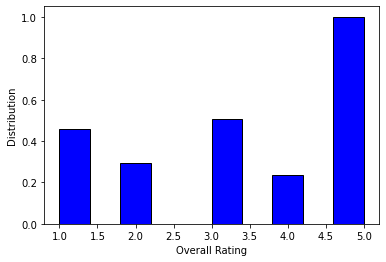

In [128]:
import math

Label_overall = df_total['overall']
plt.ylabel("Distribution")
plt.xlabel("Overall Rating")
plt.hist(Label_overall, density=True, color='b', edgecolor='black')

plt.show()

In [129]:
print(type(train_sentiment))
train_sentiment

<class 'pandas.core.series.Series'>


79286     1
483239    0
234320    1
252545    1
652109    0
         ..
866755    0
964939    0
485244    1
495110    1
725828    0
Name: sentiment, Length: 47982, dtype: int32

## Preparing Data for various text combinations

### Lower case

In [130]:
print(df_total.shape)
df_total.head(3)

(59978, 7)


,unixReviewTime,reviewText,overall,sentiment,datetimeReviewTime,Original_text,words
997698,1375401600,I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.,3.0,0,2013-08-02,I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.,24
94687,1373587200,"This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!",5.0,1,2013-07-12,"This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!",27
297302,1368921600,"I absolutely loovve my kindle fire HD. I waited over a week to do this review because I didn't want it to be compromised due to my overall excitement. I was tied between a kindle fire HD and an iPad mini. After doing some research and making my pro/con list, kindle won due to its affordable price, I even got the 32GB. I am a huge fan of amazon and already own a kindle keyboard. Not really a fan of apple, the only apple product I own is an iPod touch that I got over 4 years ago.\n\nThe display of the kindle fire HD is AH-MAZING. I was blown away at the crisp display. It makes everything look good, even the font! I find myself watching movies/shows on it rather than my 46 inch screen TV because I am just mesmerized by the display. There are plenty of apps. Since I don't own many apple products I don't have anything else to compare the apps too, but I am satisfied with what is given. Reading on the kindle fire is amazing as well, I am an avid reader so this is a huge plus. Upgrading from the kindle keyboard to the fire's back light did take some adjusting but after a day or two of reading I was comfortable with it. It has pretty cool features too such as seeing how much of the book is left displayed on the bottom of the screen and it also states up many more minutes till the next chapter! As well as some other new kinks. The speakers are nice and clear, although I wish they were a bit louder, I understand it's not suppose to be a stereo but slighter volume would of been a plus. The web experience is very nice, but it does lack flash. I heard there is a way around that, but it doesn't bother me (yet). Since I got the kindle (about 8 days ago) the web page crashed only once and that's because I had a lot of things going on at once (7+ pages open + pandora)...\n\nThey don't include a charger in the package which I think was a HUGE mistake on amazons part. The Amazon Kindle Power Fast adapter is a NECESSITY unless you want to wait 16+ hours to get your kindle charged. I used my other kindle adapter and only had it changed at 50% after 9 hours and drained to 15% after two hours of use. The very next day I went and got this charger, now it takes 6-7 hours for a full charge and the charge can last an entire day to two days depending on what you are using the kindle for.\n\nSince I got the kindle fire HD I also signed up for amazon prime to get the full experience. There are plenty of free shows and movies to watch! I just wish the kindle lending wasn't restricted to one book per month :(\n\nOverall I give this product a 4.5 rating and recommend it to everyone.",4.0,1,2013-05-19,"I absolutely loovve my kindle fire HD. I waited over a week to do this review because I didn't want it to be compromised due to my overall excitement. I was tied between a kindle fire HD and an iPad mini. After doing some research and making my pro/con list, kindle won due to its affordable price, I even got the 32GB. I am a huge fan of amazon and already own a kindle keyboard. Not really a fan of apple, the only apple product I own is an iPod touch that I got over 4 years ago.\n\nThe display of the kindle fire HD is AH-MAZING. I was blown away at the crisp display. It makes everything look good, ev

In [131]:
#df_total['reviewText_lower'] =df_total['reviewText']

In [132]:
df_total.head(3)

,unixReviewTime,reviewText,overall,sentiment,datetimeReviewTime,Original_text,words
997698,1375401600,I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.,3.0,0,2013-08-02,I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.,24
94687,1373587200,"This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!",5.0,1,2013-07-12,"This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!",27
297302,1368921600,"I absolutely loovve my kindle fire HD. I waited over a week to do this review because I didn't want it to be compromised due to my overall excitement. I was tied between a kindle fire HD and an iPad mini. After doing some research and making my pro/con list, kindle won due to its affordable price, I even got the 32GB. I am a huge fan of amazon and already own a kindle keyboard. Not really a fan of apple, the only apple product I own is an iPod touch that I got over 4 years ago.\n\nThe display of the kindle fire HD is AH-MAZING. I was blown away at the crisp display. It makes everything look good, even the font! I find myself watching movies/shows on it rather than my 46 inch screen TV because I am just mesmerized by the display. There are plenty of apps. Since I don't own many apple products I don't have anything else to compare the apps too, but I am satisfied with what is given. Reading on the kindle fire is amazing as well, I am an avid reader so this is a huge plus. Upgrading from the kindle keyboard to the fire's back light did take some adjusting but after a day or two of reading I was comfortable with it. It has pretty cool features too such as seeing how much of the book is left displayed on the bottom of the screen and it also states up many more minutes till the next chapter! As well as some other new kinks. The speakers are nice and clear, although I wish they were a bit louder, I understand it's not suppose to be a stereo but slighter volume would of been a plus. The web experience is very nice, but it does lack flash. I heard there is a way around that, but it doesn't bother me (yet). Since I got the kindle (about 8 days ago) the web page crashed only once and that's because I had a lot of things going on at once (7+ pages open + pandora)...\n\nThey don't include a charger in the package which I think was a HUGE mistake on amazons part. The Amazon Kindle Power Fast adapter is a NECESSITY unless you want to wait 16+ hours to get your kindle charged. I used my other kindle adapter and only had it changed at 50% after 9 hours and drained to 15% after two hours of use. The very next day I went and got this charger, now it takes 6-7 hours for a full charge and the charge can last an entire day to two days depending on what you are using the kindle for.\n\nSince I got the kindle fire HD I also signed up for amazon prime to get the full experience. There are plenty of free shows and movies to watch! I just wish the kindle lending wasn't restricted to one book per month :(\n\nOverall I give this product a 4.5 rating and recommend it to everyone.",4.0,1,2013-05-19,"I absolutely loovve my kindle fire HD. I waited over a week to do this review because I didn't want it to be compromised due to my overall excitement. I was tied between a kindle fire HD and an iPad mini. After doing some research and making my pro/con list, kindle won due to its affordable price, I even got the 32GB. I am a huge fan of amazon and already own a kindle keyboard. Not really a fan of apple, the only apple product I own is an iPod touch that I got over 4 years ago.\n\nThe display of the kindle fire HD is AH-MAZING. I was blown away at the crisp display. It makes everything look good, ev

In [133]:
#df_total['reviewText_lower'] = df_total['reviewText_lower'].str.lower()

In [134]:
df_total.head(3)

,unixReviewTime,reviewText,overall,sentiment,datetimeReviewTime,Original_text,words
997698,1375401600,I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.,3.0,0,2013-08-02,I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.,24
94687,1373587200,"This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!",5.0,1,2013-07-12,"This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!",27
297302,1368921600,"I absolutely loovve my kindle fire HD. I waited over a week to do this review because I didn't want it to be compromised due to my overall excitement. I was tied between a kindle fire HD and an iPad mini. After doing some research and making my pro/con list, kindle won due to its affordable price, I even got the 32GB. I am a huge fan of amazon and already own a kindle keyboard. Not really a fan of apple, the only apple product I own is an iPod touch that I got over 4 years ago.\n\nThe display of the kindle fire HD is AH-MAZING. I was blown away at the crisp display. It makes everything look good, even the font! I find myself watching movies/shows on it rather than my 46 inch screen TV because I am just mesmerized by the display. There are plenty of apps. Since I don't own many apple products I don't have anything else to compare the apps too, but I am satisfied with what is given. Reading on the kindle fire is amazing as well, I am an avid reader so this is a huge plus. Upgrading from the kindle keyboard to the fire's back light did take some adjusting but after a day or two of reading I was comfortable with it. It has pretty cool features too such as seeing how much of the book is left displayed on the bottom of the screen and it also states up many more minutes till the next chapter! As well as some other new kinks. The speakers are nice and clear, although I wish they were a bit louder, I understand it's not suppose to be a stereo but slighter volume would of been a plus. The web experience is very nice, but it does lack flash. I heard there is a way around that, but it doesn't bother me (yet). Since I got the kindle (about 8 days ago) the web page crashed only once and that's because I had a lot of things going on at once (7+ pages open + pandora)...\n\nThey don't include a charger in the package which I think was a HUGE mistake on amazons part. The Amazon Kindle Power Fast adapter is a NECESSITY unless you want to wait 16+ hours to get your kindle charged. I used my other kindle adapter and only had it changed at 50% after 9 hours and drained to 15% after two hours of use. The very next day I went and got this charger, now it takes 6-7 hours for a full charge and the charge can last an entire day to two days depending on what you are using the kindle for.\n\nSince I got the kindle fire HD I also signed up for amazon prime to get the full experience. There are plenty of free shows and movies to watch! I just wish the kindle lending wasn't restricted to one book per month :(\n\nOverall I give this product a 4.5 rating and recommend it to everyone.",4.0,1,2013-05-19,"I absolutely loovve my kindle fire HD. I waited over a week to do this review because I didn't want it to be compromised due to my overall excitement. I was tied between a kindle fire HD and an iPad mini. After doing some research and making my pro/con list, kindle won due to its affordable price, I even got the 32GB. I am a huge fan of amazon and already own a kindle keyboard. Not really a fan of apple, the only apple product I own is an iPod touch that I got over 4 years ago.\n\nThe display of the kindle fire HD is AH-MAZING. I was blown away at the crisp display. It makes everything look good, ev

### Removing Stop Words

In [135]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#df_total['reviewText_stop_Lower'] = df_total['reviewText_lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [156]:
df_total.head(3)

,unixReviewTime,reviewText,overall,sentiment,datetimeReviewTime,Original_text,words
997698,1375401600,I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.,3.0,0,2013-08-02,I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.,24
94687,1373587200,"This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!",5.0,1,2013-07-12,"This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!",27
297302,1368921600,"I absolutely loovve my kindle fire HD. I waited over a week to do this review because I didn't want it to be compromised due to my overall excitement. I was tied between a kindle fire HD and an iPad mini. After doing some research and making my pro/con list, kindle won due to its affordable price, I even got the 32GB. I am a huge fan of amazon and already own a kindle keyboard. Not really a fan of apple, the only apple product I own is an iPod touch that I got over 4 years ago.\n\nThe display of the kindle fire HD is AH-MAZING. I was blown away at the crisp display. It makes everything look good, even the font! I find myself watching movies/shows on it rather than my 46 inch screen TV because I am just mesmerized by the display. There are plenty of apps. Since I don't own many apple products I don't have anything else to compare the apps too, but I am satisfied with what is given. Reading on the kindle fire is amazing as well, I am an avid reader so this is a huge plus. Upgrading from the kindle keyboard to the fire's back light did take some adjusting but after a day or two of reading I was comfortable with it. It has pretty cool features too such as seeing how much of the book is left displayed on the bottom of the screen and it also states up many more minutes till the next chapter! As well as some other new kinks. The speakers are nice and clear, although I wish they were a bit louder, I understand it's not suppose to be a stereo but slighter volume would of been a plus. The web experience is very nice, but it does lack flash. I heard there is a way around that, but it doesn't bother me (yet). Since I got the kindle (about 8 days ago) the web page crashed only once and that's because I had a lot of things going on at once (7+ pages open + pandora)...\n\nThey don't include a charger in the package which I think was a HUGE mistake on amazons part. The Amazon Kindle Power Fast adapter is a NECESSITY unless you want to wait 16+ hours to get your kindle charged. I used my other kindle adapter and only had it changed at 50% after 9 hours and drained to 15% after two hours of use. The very next day I went and got this charger, now it takes 6-7 hours for a full charge and the charge can last an entire day to two days depending on what you are using the kindle for.\n\nSince I got the kindle fire HD I also signed up for amazon prime to get the full experience. There are plenty of free shows and movies to watch! I just wish the kindle lending wasn't restricted to one book per month :(\n\nOverall I give this product a 4.5 rating and recommend it to everyone.",4.0,1,2013-05-19,"I absolutely loovve my kindle fire HD. I waited over a week to do this review because I didn't want it to be compromised due to my overall excitement. I was tied between a kindle fire HD and an iPad mini. After doing some research and making my pro/con list, kindle won due to its affordable price, I even got the 32GB. I am a huge fan of amazon and already own a kindle keyboard. Not really a fan of apple, the only apple product I own is an iPod touch that I got over 4 years ago.\n\nThe display of the kindle fire HD is AH-MAZING. I was blown away at the crisp display. It makes everything look good, ev

## Preparing Data for various text combinations

In [157]:
for i, x in df_total.iterrows(): 
  training_string = str(x['datetimeReviewTime'].year) + ' ' +  str(x['reviewText'])
  df_total.loc[i, 'text_with_year'] = training_string 

In [158]:
df_total.shape

(59978, 8)

In [159]:
for i, x in df_total.iterrows():
    year_string = str(x['datetimeReviewTime'].year)
    df_total.loc[i, 'Year_string'] = year_string

In [160]:
df_total.head(3)

,unixReviewTime,reviewText,overall,sentiment,datetimeReviewTime,Original_text,words,text_with_year,Year_string
997698,1375401600,I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.,3.0,0,2013-08-02,I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.,24,2013 I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.,2013
94687,1373587200,"This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!",5.0,1,2013-07-12,"This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!",27,"2013 This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!",2013
297302,1368921600,"I absolutely loovve my kindle fire HD. I waited over a week to do this review because I didn't want it to be compromised due to my overall excitement. I was tied between a kindle fire HD and an iPad mini. After doing some research and making my pro/con list, kindle won due to its affordable price, I even got the 32GB. I am a huge fan of amazon and already own a kindle keyboard. Not really a fan of apple, the only apple product I own is an iPod touch that I got over 4 years ago.\n\nThe display of the kindle fire HD is AH-MAZING. I was blown away at the crisp display. It makes everything look good, even the font! I find myself watching movies/shows on it rather than my 46 inch screen TV because I am just mesmerized by the display. There are plenty of apps. Since I don't own many apple products I don't have anything else to compare the apps too, but I am satisfied with what is given. Reading on the kindle fire is amazing as well, I am an avid reader so this is a huge plus. Upgrading from the kindle keyboard to the fire's back light did take some adjusting but after a day or two of reading I was comfortable with it. It has pretty cool features too such as seeing how much of the book is left displayed on the bottom of the screen and it also states up many more minutes till the next chapter! As well as some other new kinks. The speakers are nice and clear, although I wish they were a bit louder, I understand it's not suppose to be a stereo but slighter volume would of been a plus. The web experience is very nice, but it does lack flash. I heard there is a way around that, but it doesn't bother me (yet). Since I got the kindle (about 8 days ago) the web page crashed only once and that's because I had a lot of things going on at once (7+ pages open + pandora)...\n\nThey don't include a charger in the package which I think was a HUGE mistake on amazons part. The Amazon Kindle Power Fast adapter is a NECESSITY unless you want to wait 16+ hours to get your kindle charged. I used my other kindle adapter and only had it changed at 50% after 9 hours and drained to 15% after two hours of use. The very next day I went and got this charger, now it takes 6-7 hours for a full charge and the charge can last an entire day to two days depending on what you are using the kindle for.\n\nSince I got the kindle fire HD I also signed up for amazon prime to get the full experience. There are plenty of free shows and movies to watch! I just wish the kindle lending wasn't restricted to one book per month :(\n\nOverall I give this product a 4.5 rating and recommend it to everyone.",4.0,1,2013-05-19,"I absolutely loovve my kindle fire HD. I waited over a week to do this review because I didn't want it to be compromised due to my overall excitement. I was tied between a kindle fire HD and an iPad mini. After doing some research and making my pro/con list, 

In [161]:
df_total['Year_Text_List'] = df_total.apply(lambda x: list([x['Year_string'],
                                    x['reviewText']]),axis=1)

In [162]:
df_total.head(3)

,unixReviewTime,reviewText,overall,sentiment,datetimeReviewTime,Original_text,words,text_with_year,Year_string,Year_Text_List
997698,1375401600,I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.,3.0,0,2013-08-02,I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.,24,2013 I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.,2013,"[2013, I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.]"
94687,1373587200,"This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!",5.0,1,2013-07-12,"This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!",27,"2013 This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!",2013,"[2013, This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!]"
297302,1368921600,"I absolutely loovve my kindle fire HD. I waited over a week to do this review because I didn't want it to be compromised due to my overall excitement. I was tied between a kindle fire HD and an iPad mini. After doing some research and making my pro/con list, kindle won due to its affordable price, I even got the 32GB. I am a huge fan of amazon and already own a kindle keyboard. Not really a fan of apple, the only apple product I own is an iPod touch that I got over 4 years ago.\n\nThe display of the kindle fire HD is AH-MAZING. I was blown away at the crisp display. It makes everything look good, even the font! I find myself watching movies/shows on it rather than my 46 inch screen TV because I am just mesmerized by the display. There are plenty of apps. Since I don't own many apple products I don't have anything else to compare the apps too, but I am satisfied with what is given. Reading on the kindle fire is amazing as well, I am an avid reader so this is a huge plus. Upgrading from the kindle keyboard to the fire's back light did take some adjusting but after a day or two of reading I was comfortable with it. It has pretty cool features too such as seeing how much of the book is left displayed on the bottom of the screen and it also states up many more minutes till the next chapter! As well as some other new kinks. The speakers are nice and clear, although I wish they were a bit louder, I understand it's not suppose to be a stereo but slighter volume would of been a plus. The web experience is very nice, but it does lack flash. I heard there is a way around that, but it doesn't bother me (yet). Since I got the kindle (about 8 days ago) the web page crashed only once and that's because I had a lot of things going on at once (7+ pages open + pandora)...\n\nThey don't include a charger in the package which I think was a HUGE mistake on amazons part. The Amazon Kindle Power Fast adapter is a NECESSITY unless you want to wait 16+ hours to get your kindle charged. I used my other kindle adapter and only had it changed at 50% after 9 hours and drained to 15% after two hours of use. The very next day I went and got this charger, now it takes 6-7 hours for a full charge and the charge can last an entire day to two days depending on what you are using the kindle for.\n\nSince I got the kindle fire HD I also signed up for amazon prime to get the full experience. There are plenty of free shows and movies to watch! I just wish the kindle lending wasn't restricted to one book per month :(\n\nOverall I give t

In [222]:
from transformers import AutoModel, AutoTokenizer

tokenizer1 = AutoTokenizer.from_pretrained("roberta-base")
tokenizer2 = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Amazon’s site listed RB3Pro Keyboard... "
print(sequence)
print("roBERTa-base:", tokenizer1.tokenize(sequence))
print("Bert-base-cased:",tokenizer2.tokenize(sequence))

sequence = "New NVIDIA RTX30 has 32GB of V RAM"
print(sequence)
print("roBERTa-base:", tokenizer1.tokenize(sequence))
print("Bert-base-cased:",tokenizer2.tokenize(sequence))

Amazon’s site listed RB3Pro Keyboard... 
roBERTa-base: ['Amazon', 'âĢ', 'Ļ', 's', 'Ġsite', 'Ġlisted', 'ĠRB', '3', 'Pro', 'ĠKeyboard', '...', 'Ġ']
Bert-base-cased: ['Amazon', '’', 's', 'site', 'listed', 'RB', '##3', '##P', '##ro', 'Key', '##board', '.', '.', '.']
New NVIDIA RTX30 has 32GB of V RAM
roBERTa-base: ['New', 'ĠNVIDIA', 'ĠRTX', '30', 'Ġhas', 'Ġ32', 'GB', 'Ġof', 'ĠV', 'ĠRAM']
Bert-base-cased: ['New', 'N', '##VI', '##DI', '##A', 'R', '##T', '##X', '##30', 'has', '32', '##GB', 'of', 'V', 'RAM']


## Slicing the dataset as train & test dataset

In [163]:
Max_Data_records = 10000
test_record_count= int(Max_Data_records*0.2)
train_record_count= int(Max_Data_records*0.8)
Label_stratify = df_total['sentiment']

In [164]:
#Bert Inputs
max_tokens_input = 80

learning_rate_input = 0.00005

batch_size_input = 16

epochs_input= 5

steps_input = 2

In [165]:
from sklearn.model_selection import train_test_split
train_data_original, test_data_original = train_test_split(df_total,
                                                           random_state=12345,
                                                           stratify=Label_stratify, 
                                                           train_size = train_record_count, 
                                                           test_size = test_record_count
                                                          )

# information about dataset
print("FULL Dataset: {}".format(df_total.shape))
print("TRAIN Dataset: {}".format(train_data.shape))
print("TEST Dataset: {}".format(test_data.shape))


FULL Dataset: (59978, 10)
TRAIN Dataset: (47982, 6)
TEST Dataset: (11996, 6)


### Confirming the Training & Testing Data distributions

In [166]:
train_data_original.head()

,unixReviewTime,reviewText,overall,sentiment,datetimeReviewTime,Original_text,words,text_with_year,Year_string,Year_Text_List
628085,1436659200,great item,5.0,1,2015-07-12,great item,2,2015 great item,2015,"[2015, great item]"
167501,1442620800,Great product and nice to keep sanitized.,5.0,1,2015-09-19,Great product and nice to keep sanitized.,7,2015 Great product and nice to keep sanitized.,2015,"[2015, Great product and nice to keep sanitized.]"
210962,1526342400,Bought this because of the small size of the barrel thinking that it would make smaller curls. The first one arrived broken. Fast response sent out a new one and told not to sent the other back.\n\nThis product is made of plastic (the part that you use to curl) I find it unmanageable. Will throw it out.,2.0,0,2018-05-15,Bought this because of the small size of the barrel thinking that it would make smaller curls. The first one arrived broken. Fast response sent out a new one and told not to sent the other back.\n\nThis product is made of plastic (the part that you use to curl) I find it unmanageable. Will throw it out.,58,2018 Bought this because of the small size of the barrel thinking that it would make smaller curls. The first one arrived broken. Fast response sent out a new one and told not to sent the other back.\n\nThis product is made of plastic (the part that you use to curl) I find it unmanageable. Will throw it out.,2018,"[2018, Bought this because of the small size of the barrel thinking that it would make smaller curls. The first one arrived broken. Fast response sent out a new one and told not to sent the other back.\n\nThis product is made of plastic (the part that you use to curl) I find it unmanageable. Will throw it out.]"
904879,1498348800,"Would not recommend, it had a weak taste. Would not reorder.",1.0,0,2017-06-25,"Would not recommend, it had a weak taste. Would not reorder.",11,"2017 Would not recommend, it had a weak taste. Would not reorder.",2017,"[2017, Would not recommend, it had a weak taste. Would not reorder.]"
129266,1431820800,Like the product was reccomended by my dentist. Flossing is still required. Another tool to use for fighting tooth decay.,4.0,1,2015-05-17,Like the product was reccomended by my dentist. Flossing is still required. Another tool to use for fighting tooth decay.,20,2015 Like the product was reccomended by my dentist. Flossing is still required. Another tool to use for fighting tooth decay.,2015,"[2015, Like the product was reccomended by my dentist. Flossing is still required. Another tool to use for fighting tooth decay.]"


In [167]:
#file_name ='Training_Data.xlsx'
#train_data_original.to_excel(file_name) 

In [168]:
#file_name ='Test_Data.xlsx'
#test_data_original.to_excel(file_name) 

In [169]:
df_temp = train_data_original
pd.crosstab(df_temp['sentiment'], df_temp['Year_string'], margins=True, margins_name = 'Total')

Year_string,2013,2014,2015,2016,2017,2018,Total
sentiment,,,,,,,
0,645,626,647,695,720,704,4037
1,715,668,692,619,614,655,3963
Total,1360,1294,1339,1314,1334,1359,8000


In [170]:
df_temp = test_data_original
pd.crosstab(df_temp['sentiment'], df_temp['Year_string'], margins=True, margins_name = 'Total')

Year_string,2013,2014,2015,2016,2017,2018,Total
sentiment,,,,,,,
0,163,167,159,168,189,163,1009
1,174,167,183,158,143,166,991
Total,337,334,342,326,332,329,2000


# BERT Base Clean Text (Model_1)

In [120]:
train_data = copy.deepcopy(train_data_original)
test_data = copy.deepcopy(test_data_original)

In [121]:
train_text = train_data['Original_text']
train_sentiment = train_data['sentiment']
train_text = tf.convert_to_tensor(train_text)
train_sentiment  = tf.convert_to_tensor(train_sentiment)

test_text = test_data['Original_text']
test_sentiment = test_data['sentiment']
test_text = tf.convert_to_tensor(test_text)
test_sentiment = tf.convert_to_tensor(test_sentiment)

In [122]:
from multiprocessing import Pool, cpu_count
from tools import *
# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
logging.basicConfig(level=logging.INFO)

#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [130]:
# Clear any logs from previous runs
#rm -rf ./logs/
import datetime
today = datetime.date.today()
today
logdir="/logs/" + today.strftime("%Y%m%d-%H%M%S")
logdir

'/logs/20211202-000000'

In [131]:
from transformers import AlbertTokenizer, AlbertModel
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import backend as K
tokenizer_bert_base = BertTokenizer.from_pretrained('bert-base-cased')
bert_model = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [132]:
x_train = tokenizer_bert_base([str(x.numpy())[2:] for x in train_text], 
              max_length=max_tokens_input,
              truncation=True, padding='max_length', return_tensors='tf')
y_train = train_sentiment

x_test = tokenizer_bert_base([str(x.numpy())[2:] for x in test_text], 
              max_length=max_tokens_input,
              truncation=True, padding='max_length', return_tensors='tf')
y_test = test_sentiment

In [133]:
def create_classification_model(hidden_size = 200, 
                                train_layers = -1, 
                                optimizer=tf.keras.optimizers.Adam(learning_rate_input)):

    input_ids = tf.keras.layers.Input(shape=(max_tokens_input,), dtype=tf.int32, name='input_ids_layer')
    token_type_ids = tf.keras.layers.Input(shape=(max_tokens_input,), dtype=tf.int32, name='token_type_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(max_tokens_input,), dtype=tf.int32, name='attention_mask_layer')

    bert_inputs = {'input_ids': input_ids,
                  'token_type_ids': token_type_ids,
                  'attention_mask': attention_mask}


    #restrict training to the train_layers outer transformer layers
    if not train_layers == -1:

            retrain_layers = []

            for retrain_layer_number in range(train_layers):

                layer_code = '_' + str(11 - retrain_layer_number)
                retrain_layers.append(layer_code)

            for w in bert_model.weights:
                if not any([x in w.name for x in retrain_layers]):
                    w._trainable = False


    bert_out = bert_model(bert_inputs)


    classification_token = tf.keras.layers.Lambda(lambda x: x[:,0,:], name='get_first_vector')(bert_out[0])


    hidden = tf.keras.layers.Dense(hidden_size, name='hidden_layer')(classification_token)

    classification = tf.keras.layers.Dense(1, activation='sigmoid',name='classification_layer')(hidden)

    classification_model = tf.keras.Model(inputs=[input_ids, token_type_ids, attention_mask], 
                                          outputs=[classification])
    
    classification_model.compile(optimizer=optimizer,
                            loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                            metrics='accuracy')


    return classification_model   

In [134]:
classification_model = create_classification_model()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

In [382]:
classification_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask],
                         y_train,
                         validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask],
                         y_test),
                        epochs=epochs_input,
                        batch_size=batch_size_input)

Epoch 1/5
500/500 [==============================] - 1895s 4s/step - loss: 0.3520 - accuracy: 0.8474 - val_loss: 0.2638 - val_accuracy: 0.8950
Epoch 2/5
500/500 [==============================] - 1880s 4s/step - loss: 0.1770 - accuracy: 0.9308 - val_loss: 0.2789 - val_accuracy: 0.8930
Epoch 3/5
500/500 [==============================] - 1879s 4s/step - loss: 0.0948 - accuracy: 0.9649 - val_loss: 0.4059 - val_accuracy: 0.8795
Epoch 4/5
500/500 [==============================] - 1878s 4s/step - loss: 0.0738 - accuracy: 0.9737 - val_loss: 0.4511 - val_accuracy: 0.8795
Epoch 5/5
500/500 [==============================] - 1874s 4s/step - loss: 0.0428 - accuracy: 0.9846 - val_loss: 0.4843 - val_accuracy: 0.8870


In [396]:
classification_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                             batch_size=batch_size_input, 
                             steps=steps_input)

array([[9.9984252e-01],
       [9.9977911e-01],
       [1.0462936e-05],
       [5.3729300e-06],
       [9.9995875e-01],
       [2.1945012e-05],
       [5.9219701e-06],
       [9.9995315e-01],
       [1.2642741e-03],
       [8.1454900e-06],
       [6.1906958e-06],
       [9.9973512e-01],
       [9.9540424e-01],
       [2.9337468e-06],
       [9.9993563e-01],
       [2.3262946e-05],
       [4.8184395e-04],
       [9.9969006e-01],
       [6.4325333e-04],
       [9.9863422e-01],
       [9.9367690e-01],
       [2.2017901e-05],
       [9.9841273e-01],
       [9.9993145e-01],
       [1.4969707e-04],
       [2.4817276e-05],
       [5.1477668e-06],
       [9.9987370e-01],
       [2.0837542e-05],
       [8.3347986e-06],
       [9.9971616e-01],
       [9.9996448e-01]], dtype=float32)

### Bert Model FrameWork Diagram

In [139]:
from datetime import datetime
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [140]:
classification_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask],
                         y_train,
                         validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask],
                         y_test),
                        epochs=1,
                        batch_size=batch_size_input,callbacks=[tensorboard_callback])

500/500 [==============================] - 1837s 4s/step - loss: 0.1786 - accuracy: 0.9311 - val_loss: 0.3569 - val_accuracy: 0.8775


In [1]:
print(logdir)
%load_ext tensorboard
%tensorboard --logdir logs

NameError: name 'logdir' is not defined

In [ ]:
classification_model.save('saved_model/bert_base_Original_Text')

In [ ]:
predictions_model_0 = classification_model.predict([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask])

In [ ]:
predictions_model_0

In [ ]:
predictions = predictions_model_0

### Evaluations

In [ ]:
predictions_values = []
Actual_probabilities =[]
for p in predictions:
    value = p[0]
    Actual_probabilities.append(value)
    if value >= 0.5:
        predictions_values.append(1)
    else:
        predictions_values.append(0)

In [ ]:
predictions_values = []
Actual_probabilities =[]
for p in predictions:
    value = p[0]
    Actual_probabilities.append(value)
    if value >= 0.5:
        predictions_values.append(1)
    else:
        predictions_values.append(0)
        
test_sentiment = test_data['sentiment']
sentiment_list = test_sentiment.to_list()
data_year = test_data['Year_string'].to_list()
data_text = test_data['Original_text'].to_list()
rating = test_data['overall'].to_list()


false_positive = {'Year': [],'Text': [], 'Overall Rating': [],'Sentiment':[],'Prediction_value': [], 'Predicted_prob': []}
false_negative = {'Year': [],'Text': [], 'Overall Rating': [],'Sentiment':[],'Prediction_value': [], 'Predicted_prob': []}
Correct_values = {'Year': [],'Text': [], 'Overall Rating': [],'Sentiment':[],'Prediction_value': [], 'Predicted_prob': []}
false_positive = pd.DataFrame(false_positive)
false_negative = pd.DataFrame(false_negative)
Correct_values = pd.DataFrame(Correct_values)

In [ ]:
correct_year_concat = {'2013': 0, '2014': 0, '2015': 0, '2016': 0, '2017': 0, '2018': 0}

for i in range(len(sentiment_list)):
    sent = sentiment_list[i]
    year = data_year[i].split()[0]
    text = data_text[i]
    text = str(text)
    if len(text)>500:
        text =text[0:500]
    else :
        text= text 
    if predictions_values[i] == sentiment_list[i]:
        new_row = {'Year': data_year[i],'Text': text, 'Overall Rating': rating[i],'Sentiment':sentiment_list[i],'Prediction_value': predictions_values[i],'Predicted_prob': Actual_probabilities[i]}
        Correct_values = Correct_values.append(new_row, ignore_index=True)
    else:
        if predictions_values[i] == 1:
            new_row = {'Year': data_year[i],'Text': text, 'Overall Rating': rating[i],'Sentiment': sentiment_list[i],'Prediction_value': predictions_values[i],'Predicted_prob': Actual_probabilities[i]}
            false_positive = false_positive.append(new_row, ignore_index=True)
        else:
            new_row = {'Year': data_year[i],'Text': text, 'Overall Rating': rating[i],'Sentiment':sentiment_list[i],'Prediction_value': predictions_values[i],'Predicted_prob': Actual_probabilities[i]}
            false_negative = false_negative.append(new_row, ignore_index=True)

In [ ]:
Examples = 10
import random
false_positive_samples = false_positive

print("False Positive \n")
print("*" * 50)


from sklearn.utils import shuffle
false_positive_samples = shuffle(false_positive_samples)

false_positive_samples[0:Examples]

In [ ]:
false_negative_samples = false_negative

print("False Negative \n",)

print("*" * 50)
print('\n')

from sklearn.utils import shuffle
false_negative_samples = shuffle(false_negative_samples)

false_negative_samples[0:Examples]

In [ ]:
false_positive.insert(0, 'Name', 'false_positive')

false_negative.insert(0, 'Name', 'false_negative')

Correct_values.insert(0, 'Name', 'Correct_values')

frames_1 = [false_positive, false_negative,Correct_values]

frames_2 =[false_positive, false_negative]

result_incorrect = pd.concat(frames_2)

result_all = pd.concat(frames_1)
result_all

In [ ]:
df_result_all = result_all

df_result_incorrect = result_incorrect
pd.crosstab(df_result_incorrect['Overall Rating'], df_result_incorrect['Name'], margins=True, margins_name = 'Total')

In [ ]:
pd.crosstab(df_result_all['Overall Rating'], df_result_all['Name']).plot.bar(stacked=True)

# BERT YEar + Text Concat (Model_2)

In [60]:
train_data = copy.deepcopy(train_data_original)
test_data = copy.deepcopy(test_data_original)

In [61]:
train_data.head(2)

,unixReviewTime,reviewText,overall,sentiment,datetimeReviewTime,Original_text,words,text_with_year,Year_string,Year_Text_List
628085,1436659200,great item,5.0,1,2015-07-12,great item,2,2015 great item,2015,"[2015, great item]"
167501,1442620800,Great product and nice to keep sanitized.,5.0,1,2015-09-19,Great product and nice to keep sanitized.,7,2015 Great product and nice to keep sanitized.,2015,"[2015, Great product and nice to keep sanitized.]"


In [62]:
train_text = train_data['text_with_year']
train_sentiment = train_data['sentiment']
train_text = tf.convert_to_tensor(train_text)
train_sentiment  = tf.convert_to_tensor(train_sentiment)

test_text = test_data['text_with_year']
test_sentiment = test_data['sentiment']
test_text = tf.convert_to_tensor(test_text)
test_sentiment = tf.convert_to_tensor(test_sentiment)

In [63]:
print(train_text)
print(train_sentiment)
print(train_text)
print(train_sentiment)

tf.Tensor(
[b'2015 great item' b'2015 Great product and nice to keep sanitized.'
 b'2018 Bought this because of the small size of the barrel thinking that it would make smaller curls. The first one arrived broken. Fast response sent out a new one and told not to sent the other back.\n\nThis product is made of plastic (the part that you use to curl) I find it unmanageable. Will throw it out.'
 ... b'2017 great fit'
 b'2014 This is a liquid, so when sugar is the first ingredient, ahead of water, it is terrible. You might ass well inject sugar into your bloodstream.'
 b"2018 First after the first month unless you pay a monthly fee there is no way to view video recording which would make it useless as security record. You can't store any of the images on your computer or phone, you have to pay them to do it. Second the app always takes too long to open and see who is at the door to be really useful. This is true for all the Ring camaras. So get ready for $100 yearly fee"], shape=(8000,), d

In [64]:
x_train = tokenizer_bert_base([str(x.numpy())[2:] for x in train_text], 
              max_length=max_tokens_input,
              truncation=True, padding='max_length', return_tensors='tf')
y_train = train_sentiment

x_test = tokenizer_bert_base([str(x.numpy())[2:] for x in test_text], 
              max_length=max_tokens_input,
              truncation=True, padding='max_length', return_tensors='tf')
y_test = test_sentiment

In [65]:
def create_classification_model(hidden_size = 200, 
                                train_layers = -1, 
                                optimizer=tf.keras.optimizers.Adam(learning_rate_input)):

    input_ids = tf.keras.layers.Input(shape=(max_tokens_input,), dtype=tf.int32, name='input_ids_layer')
    token_type_ids = tf.keras.layers.Input(shape=(max_tokens_input,), dtype=tf.int32, name='token_type_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(max_tokens_input,), dtype=tf.int32, name='attention_mask_layer')

    bert_inputs = {'input_ids': input_ids,
                  'token_type_ids': token_type_ids,
                  'attention_mask': attention_mask}


    #restrict training to the train_layers outer transformer layers
    if not train_layers == -1:

            retrain_layers = []

            for retrain_layer_number in range(train_layers):

                layer_code = '_' + str(11 - retrain_layer_number)
                retrain_layers.append(layer_code)

            for w in bert_model.weights:
                if not any([x in w.name for x in retrain_layers]):
                    w._trainable = False


    bert_out = bert_model(bert_inputs)


    classification_token = tf.keras.layers.Lambda(lambda x: x[:,0,:], name='get_first_vector')(bert_out[0])


    hidden = tf.keras.layers.Dense(hidden_size, name='hidden_layer')(classification_token)

    classification = tf.keras.layers.Dense(1, activation='sigmoid',name='classification_layer')(hidden)

    classification_model = tf.keras.Model(inputs=[input_ids, token_type_ids, attention_mask], 
                                          outputs=[classification])
    
    classification_model.compile(optimizer=optimizer,
                            loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                            metrics='accuracy')


    return classification_model  

In [66]:
classification_model = create_classification_model()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

In [67]:
classification_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
attention_mask_layer (InputLaye [(None, 80)]         0                                            
__________________________________________________________________________________________________
input_ids_layer (InputLayer)    [(None, 80)]         0                                            
__________________________________________________________________________________________________
token_type_ids_layer (InputLaye [(None, 80)]         0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 108310272   attention_mask_layer[0][0]       
                                                                 input_ids_layer[0][0] 

In [68]:
classification_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask],
                         y_train,
                         validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask],
                         y_test),
                        epochs=epochs_input,
                        batch_size=batch_size_input)

Epoch 1/5
500/500 [==============================] - 1828s 4s/step - loss: 0.3577 - accuracy: 0.8446 - val_loss: 0.2532 - val_accuracy: 0.8990
Epoch 2/5
500/500 [==============================] - 1822s 4s/step - loss: 0.1749 - accuracy: 0.9324 - val_loss: 0.3259 - val_accuracy: 0.8835
Epoch 3/5
500/500 [==============================] - 1856s 4s/step - loss: 0.1047 - accuracy: 0.9614 - val_loss: 0.3403 - val_accuracy: 0.8855
Epoch 4/5
500/500 [==============================] - 1867s 4s/step - loss: 0.0735 - accuracy: 0.9732 - val_loss: 0.4098 - val_accuracy: 0.8940
Epoch 5/5
500/500 [==============================] - 1846s 4s/step - loss: 0.0573 - accuracy: 0.9806 - val_loss: 0.4203 - val_accuracy: 0.8805


In [69]:
classification_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                             batch_size=batch_size_input, 
                             steps=steps_input)

array([[9.99995708e-01],
       [9.99989510e-01],
       [1.18999385e-04],
       [5.37304040e-05],
       [9.99408185e-01],
       [1.82569027e-04],
       [1.60038471e-04],
       [9.99977469e-01],
       [8.20904970e-04],
       [1.07452273e-03],
       [3.21894884e-04],
       [9.99604940e-01],
       [9.87433553e-01],
       [7.14596827e-05],
       [9.99943018e-01],
       [1.30176544e-04],
       [3.88470653e-05],
       [9.99859929e-01],
       [8.85495538e-05],
       [9.99139071e-01],
       [9.99967754e-01],
       [1.47312880e-04],
       [9.99213696e-01],
       [9.84140813e-01],
       [3.43861580e-02],
       [8.29580426e-03],
       [9.34343407e-05],
       [9.99413788e-01],
       [2.19523907e-04],
       [6.95228577e-03],
       [9.99837518e-01],
       [9.99992073e-01]], dtype=float32)

In [71]:
classification_model.save('saved_model/Bert_YearTextConcat')

In [73]:
from datetime import datetime
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [76]:
#classification_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask],callbacks=[tensorboard_callback])

In [77]:
#%tensorboard --logdir logs

In [78]:
predictions_model_2 = classification_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])

In [80]:
predictions_model_2

predictions = predictions_model_2

### Evalution & Errror Analysis

In [81]:
predictions_values = []
Actual_probabilities =[]
for p in predictions:
    value = p[0]
    Actual_probabilities.append(value)
    if value >= 0.5:
        predictions_values.append(1)
    else:
        predictions_values.append(0)
        
predictions_values = []
Actual_probabilities =[]
for p in predictions:
    value = p[0]
    Actual_probabilities.append(value)
    if value >= 0.5:
        predictions_values.append(1)
    else:
        predictions_values.append(0)
        
test_sentiment = test_data['sentiment']
sentiment_list = test_sentiment.to_list()
data_year = test_data['Year_string'].to_list()
data_text = test_data['Original_text'].to_list()
rating = test_data['overall'].to_list()


false_positive = {'Year': [],'Text': [], 'Overall Rating': [],'Sentiment':[],'Prediction_value': [], 'Predicted_prob': []}
false_negative = {'Year': [],'Text': [], 'Overall Rating': [],'Sentiment':[],'Prediction_value': [], 'Predicted_prob': []}
Correct_values = {'Year': [],'Text': [], 'Overall Rating': [],'Sentiment':[],'Prediction_value': [], 'Predicted_prob': []}
false_positive = pd.DataFrame(false_positive)
false_negative = pd.DataFrame(false_negative)
Correct_values = pd.DataFrame(Correct_values)

for i in range(len(sentiment_list)):
    sent = sentiment_list[i]
    year = data_year[i].split()[0]
    text = data_text[i]
    text = str(text)
    if len(text)>500:
        text =text[0:500]
    else :
        text= text 
    if predictions_values[i] == sentiment_list[i]:
        new_row = {'Year': data_year[i],'Text': text, 'Overall Rating': rating[i],'Sentiment':sentiment_list[i],'Prediction_value': predictions_values[i],'Predicted_prob': Actual_probabilities[i]}
        Correct_values = Correct_values.append(new_row, ignore_index=True)
    else:
        if predictions_values[i] == 1:
            new_row = {'Year': data_year[i],'Text': text, 'Overall Rating': rating[i],'Sentiment': sentiment_list[i],'Prediction_value': predictions_values[i],'Predicted_prob': Actual_probabilities[i]}
            false_positive = false_positive.append(new_row, ignore_index=True)
        else:
            new_row = {'Year': data_year[i],'Text': text, 'Overall Rating': rating[i],'Sentiment':sentiment_list[i],'Prediction_value': predictions_values[i],'Predicted_prob': Actual_probabilities[i]}
            false_negative = false_negative.append(new_row, ignore_index=True)

In [82]:
Examples = 15
import random
false_positive_samples = false_positive

print("False Positive \n")
print("*" * 50)


from sklearn.utils import shuffle
false_positive_samples = shuffle(false_positive_samples)

false_positive_samples[0:Examples]

False Positive 

**************************************************


,Year,Text,Overall Rating,Sentiment,Prediction_value,Predicted_prob
405,2016,"Good thing their cheap because they don't last. First two pairs of these that I had the cord shorted out within a month. The third pair has lasted a little longer however this pair the right headphone has gone out. Not sure if it the cord again or due to sweat but in either case, these headphones are just not very durable.",2.0,0.0,1.0,0.991886
268,2014,"This magazine is OK, although as a teaching aide there are much, much better resources out there, particularly online. I've used it mainly to satisfy the urge to look at/read about beautiful guitars and the luthiers who make them.\n\nMy complaint is mostly with their customer service. I received from them, in the mail, an offer for a renewed subscription at $19.95 for the year, along with a free subscription to their Acoustic Guitar University online lessons. It gave you the option of mailing i",1.0,0.0,1.0,0.999454
486,2013,"Hi, I would not know how good the guitar was since all I got was a box with remains of a guitar, it was trashed!! Imagine my horror when I opened the package! But I can return it, however impossible to exchange it for another for some unknown reason. Well, lets hope that he next time is the charm. Giving a good grade for the return policy.",3.0,0.0,1.0,0.999990
289,2017,"Started falling apart after about 4 months. My daughter did take it to school everyday, but I thought that was the norm nowadays.",3.0,0.0,1.0,0.999982
475,2018,Was working great until 1/26/2018. Please fix your skills.,1.0,0.0,1.0,0.999995
192,2018,"This device is described as a power supply, but I would describe it more like a noise factory.\n\nThe good: It supplies 9 VDC, center negative, so it will power your pedals. It's super light.\n\nThe bad: OMG, I haven't tried to take this power supply apart, but I'll have to assume that someone forgot to install the filter caps or that they're blown, because any pedal I've used this to power instantly has an insane amount of noise and hiss (and a bit of a low frequency growl). The same pedals using",2.0,0.0,1.0,0.999972
84,2017,Great sounds good,3.0,0.0,1.0,0.935688
290,2015,"I am having a tough time getting the sound I want just right from this head. I am still experimenting with what pedals give me what I am after. That being said, it is after all a Marshall so I know I will get what I am seeking. The option of 40 or 100 watts is very handy as well",3.0,0.0,1.0,0.995115
261,2016,Pencil doesn't work very well on this paper.,3.0,0.0,1.0,0.999988
241,2013,Using a Perris premium leather strap....\n\nThe guitar bolt's cylinderical core doesn't have enough space to fit both strap and a strap block.. Waste of money on first guitar tested.,1.0,0.0,1.0,0.999998


In [83]:
false_negative_samples = false_negative

print("False Negative \n",)

print("*" * 50)
print('\n')

from sklearn.utils import shuffle
false_negative_samples = shuffle(false_negative_samples)

false_negative_samples[0:Examples]

False Negative 

**************************************************




,Year,Text,Overall Rating,Sentiment,Prediction_value,Predicted_prob
331,2016,"Great color combo, maybe a little on the thicker side but overall happy!",4.0,1.0,0.0,0.000416
26,2018,"I am very happy with this purchase. It was easy to set up and does all I need it to. The picture is pretty good depending on the conditions, if the light is very bright, its not as clear but you can see everything and at night a little bit off but still ok. You can hear everything going on very clearly and when you speak, the sound is good. overall a good buy.",5.0,1.0,0.0,0.000055
240,2013,"Seriously, don't bother even looking at other apps for viewing webcams! This is THE BEST one, trust me and the other reviewers. I have 2 Loftek CXS 2200 webcams, and as I had expected, this app works flawlessly with them. It works so well that I got the paid versions for Android AND for iOS (to use with my iPad). So, get the free version, try it out to make sure that it works with your camera (I would be surprised if it doesn't! And would blame your camera... he he), and then get the paid versio",5.0,1.0,0.0,0.004418
486,2018,just what I needed for utilitarian primping and beauty processes.,5.0,1.0,0.0,0.000139
126,2015,Fast Shipping and worked as described. fit perfectly in dell diminsion 8500,5.0,1.0,0.0,0.230743
406,2016,WONDERFULL,5.0,1.0,0.0,0.002081
459,2013,"The memory upgrade which I ordered to improve my dell computer arrived in great time, was exactly what I ordered, packaged well, also protected against any wet weather and it works perfectly.",5.0,1.0,0.0,0.012205
447,2016,A good case.,5.0,1.0,0.0,0.000219
163,2016,"Um, I'm so hesitant to review this product. What your basically saying is I tested this on my nasty bum and tadah! It is no longer nasty :)\n\nIt's true though! I've never in my 33 years even heard of a product like this. After having a baby, 3 months ago I did stock up on feminine washes out of necessity due to sensitivity.\n\nLook, all I can say without totally sharing my business is that this product works. I will keep this in my travel/overnight bag. You know the stress of traveling actually agg",4.0,1.0,0.0,0.019555
363,2013,This Kindle replaces one I had for almost 2 years. I went over a week without my kindle and did not think I would make it until my new one came. The good part is I had taken out the warranty offered by Amazon and am so glad I did. I just called and explained my problem and zap! a new one was on it's way. Thank you Amazon,5.0,1.0,0.0,0.000318


In [84]:
false_positive.insert(0, 'Name', 'false_positive')

false_negative.insert(0, 'Name', 'false_negative')
frames_2 =[false_positive, false_negative]
result_incorrect = pd.concat(frames_2)
df_result_incorrect = result_incorrect
pd.crosstab(df_result_incorrect['Overall Rating'], df_result_incorrect['Name'], margins=True, margins_name = 'Total')

Name,false_negative,false_positive,Total
Overall Rating,,,
1.0,0,185,185
2.0,0,106,106
3.0,0,212,212
4.0,104,0,104
5.0,385,0,385
Total,489,503,992


# Bert Model Year + Text Seperated (Model_3)

In [223]:
sample_text=[['2013', 'This is great']]
sample_text[0]

['2013', 'This is great']

In [224]:
x= tokenizer_bert_base(sample_text,max_length=100,
          truncation=True, 
          padding='max_length', 
          return_tensors='tf')
x

{'input_ids': <tf.Tensor: shape=(1, 100), dtype=int32, numpy=
array([[ 101, 1381,  102, 1188, 1110, 1632,  102,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]])>, 'token_type_ids': <tf.Tensor: shape=(1, 100), dtype=int32, numpy=
array([[0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [225]:
temp_df =df_total[0:2]

In [226]:
temp_df

,unixReviewTime,reviewText,overall,sentiment,datetimeReviewTime,Original_text,words,text_with_year,Year_string,Year_Text_List
997698,1375401600,I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.,3.0,0,2013-08-02,I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.,24,2013 I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.,2013,"[2013, I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.]"
94687,1373587200,"This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!",5.0,1,2013-07-12,"This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!",27,"2013 This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!",2013,"[2013, This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!]"


In [227]:
#temp_df = temp_df.reset_index(drop=True)

In [228]:
Year_token =temp_df['Year_string']
Year_token

997698    2013
94687     2013
Name: Year_string, dtype: object

In [229]:
text_token= temp_df['reviewText']
text_token

997698                                      I don't really dislike it but it is difficult to work with because it is hard you should give more information about your products.
94687     This stuff really works. Worked in the heat with ridiculous humidity, parties with vigorous dancing and even some light workouts. Get it... your balls will be siked!
Name: reviewText, dtype: object

In [230]:
x_train = tokenizer_bert_base([str(x) for x in Year_token], [str(x) for x in text_token],
              max_length=max_tokens_input,
              truncation=True, padding='max_length', return_tensors='tf')

x_test  = tokenizer_bert_base([str(x) for x in Year_token], [str(x) for x in text_token],
              max_length=max_tokens_input,
              truncation=True, padding='max_length', return_tensors='tf')

In [231]:
x_train.input_ids

<tf.Tensor: shape=(2, 80), dtype=int32, numpy=
array([[  101,  1381,   102,   146,  1274,   112,   189,  1541, 20662,
         1122,  1133,  1122,  1110,  2846,  1106,  1250,  1114,  1272,
         1122,  1110,  1662,  1128,  1431,  1660,  1167,  1869,  1164,
         1240,  2982,   119,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [  101,  1381,   102,  1188,  4333,  1541,  1759,   119,  6955,
         1174,  1107,  1103,  3208,  1114,  9944, 20641,   117,  3512,
         1114, 24739,  5923,  1105,  1256,  1199,  1609,  1250, 10469,
          119,  3949,  1122,   119,   119,   119,  1240,  7318,  1209,
         1129, 27466,  7831,   106, 

In [232]:
train_data = copy.deepcopy(train_data_original)
test_data = copy.deepcopy(test_data_original)

In [233]:
train_data_year = train_data['Year_string']
train_data_text = train_data['reviewText']
test_data_year = test_data['Year_string']
test_data_text = test_data['reviewText']

In [234]:
train_sentiment = train_data['sentiment']
train_sentiment  = tf.convert_to_tensor(train_sentiment)

In [235]:
test_sentiment = test_data['sentiment']
test_sentiment = tf.convert_to_tensor(test_sentiment)

In [236]:
x_train = tokenizer_bert_base([str(x) for x in train_data_year],
                              [str(x) for x in train_data_text],
                              max_length=max_tokens_input,
                              truncation=True, 
                              padding='max_length', 
                              return_tensors='tf')


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

In [237]:
y_train = train_sentiment

In [238]:
x_test = tokenizer_bert_base([str(x) for x in test_data_year],
                              [str(x) for x in test_data_text],
                              max_length=max_tokens_input,
                              truncation=True, 
                              padding='max_length', 
                              return_tensors='tf')

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

In [239]:
y_test = test_sentiment

In [240]:
def create_classification_model(hidden_size = 200, 
                                train_layers = -1, 
                                optimizer=tf.keras.optimizers.Adam(learning_rate_input)):

    input_ids = tf.keras.layers.Input(shape=(max_tokens_input,), dtype=tf.int32, name='input_ids_layer')
    token_type_ids = tf.keras.layers.Input(shape=(max_tokens_input,), dtype=tf.int32, name='token_type_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(max_tokens_input,), dtype=tf.int32, name='attention_mask_layer')

    bert_inputs = {'input_ids': input_ids,
                  'token_type_ids': token_type_ids,
                  'attention_mask': attention_mask}


    #restrict training to the train_layers outer transformer layers
    if not train_layers == -1:

            retrain_layers = []

            for retrain_layer_number in range(train_layers):

                layer_code = '_' + str(11 - retrain_layer_number)
                retrain_layers.append(layer_code)

            for w in bert_model.weights:
                if not any([x in w.name for x in retrain_layers]):
                    w._trainable = False


    bert_out = bert_model(bert_inputs)


    classification_token = tf.keras.layers.Lambda(lambda x: x[:,0,:], name='get_first_vector')(bert_out[0])


    hidden = tf.keras.layers.Dense(hidden_size, name='hidden_layer')(classification_token)

    classification = tf.keras.layers.Dense(1, activation='sigmoid',name='classification_layer')(hidden)

    classification_model = tf.keras.Model(inputs=[input_ids, token_type_ids, attention_mask], 
                                          outputs=[classification])
    
    classification_model.compile(optimizer=optimizer,
                            loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                            metrics='accuracy')


    return classification_model  

In [241]:
classification_model_3 = create_classification_model()

In [242]:
from datetime import datetime
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
print(logdir)

logs/fit/20211203-054601


In [243]:
classification_model_3.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask],
                           y_train,
                           validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask],y_test),
                           epochs=epochs_input,
                           batch_size=batch_size_input,
                           callbacks=[tensorboard_callback])

Epoch 1/5
500/500 [==============================] - 1885s 4s/step - loss: 0.0626 - accuracy: 0.9762 - val_loss: 0.3598 - val_accuracy: 0.8815
Epoch 2/5
500/500 [==============================] - 1848s 4s/step - loss: 0.0395 - accuracy: 0.9854 - val_loss: 0.5836 - val_accuracy: 0.8825
Epoch 3/5
500/500 [==============================] - 1834s 4s/step - loss: 0.0414 - accuracy: 0.9862 - val_loss: 0.5472 - val_accuracy: 0.8985
Epoch 4/5
500/500 [==============================] - 1838s 4s/step - loss: 0.0436 - accuracy: 0.9860 - val_loss: 0.3754 - val_accuracy: 0.8875
Epoch 5/5
500/500 [==============================] - 1835s 4s/step - loss: 0.0311 - accuracy: 0.9880 - val_loss: 0.5033 - val_accuracy: 0.8890


In [244]:
print(logdir)
%load_ext tensorboard

logs/fit/20211203-054601


In [245]:
classification_model.save('saved_model/Bert_Year_Text_Seperated')

In [246]:
predictions_model_3 = classification_model_3.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])

In [247]:
predictions_model_3

array([[9.9998975e-01],
       [9.9997765e-01],
       [1.2987852e-04],
       ...,
       [9.9590194e-01],
       [2.3209432e-05],
       [4.2279648e-06]], dtype=float32)

In [248]:
predictions = predictions_model_3

In [249]:
predictions_values = []
Actual_probabilities =[]
for p in predictions:
    value = p[0]
    Actual_probabilities.append(value)
    if value >= 0.5:
        predictions_values.append(1)
    else:
        predictions_values.append(0)
        
predictions_values = []
Actual_probabilities =[]
for p in predictions:
    value = p[0]
    Actual_probabilities.append(value)
    if value >= 0.5:
        predictions_values.append(1)
    else:
        predictions_values.append(0)
        
test_sentiment = test_data['sentiment']
sentiment_list = test_sentiment.to_list()
data_year = test_data['Year_string'].to_list()
data_text = test_data['Original_text'].to_list()
rating = test_data['overall'].to_list()


false_positive = {'Year': [],'Text': [], 'Overall Rating': [],'Sentiment':[],'Prediction_value': [], 'Predicted_prob': []}
false_negative = {'Year': [],'Text': [], 'Overall Rating': [],'Sentiment':[],'Prediction_value': [], 'Predicted_prob': []}
Correct_values = {'Year': [],'Text': [], 'Overall Rating': [],'Sentiment':[],'Prediction_value': [], 'Predicted_prob': []}
false_positive = pd.DataFrame(false_positive)
false_negative = pd.DataFrame(false_negative)
Correct_values = pd.DataFrame(Correct_values)

for i in range(len(sentiment_list)):
    sent = sentiment_list[i]
    year = data_year[i].split()[0]
    text = data_text[i]
    text = str(text)
    if len(text)>500:
        text =text[0:500]
    else :
        text= text 
    if predictions_values[i] == sentiment_list[i]:
        new_row = {'Year': data_year[i],'Text': text, 'Overall Rating': rating[i],'Sentiment':sentiment_list[i],'Prediction_value': predictions_values[i],'Predicted_prob': Actual_probabilities[i]}
        Correct_values = Correct_values.append(new_row, ignore_index=True)
    else:
        if predictions_values[i] == 1:
            new_row = {'Year': data_year[i],'Text': text, 'Overall Rating': rating[i],'Sentiment': sentiment_list[i],'Prediction_value': predictions_values[i],'Predicted_prob': Actual_probabilities[i]}
            false_positive = false_positive.append(new_row, ignore_index=True)
        else:
            new_row = {'Year': data_year[i],'Text': text, 'Overall Rating': rating[i],'Sentiment':sentiment_list[i],'Prediction_value': predictions_values[i],'Predicted_prob': Actual_probabilities[i]}
            false_negative = false_negative.append(new_row, ignore_index=True)

In [252]:
Examples = 15
import random
false_positive_samples = false_positive

print("False Positive \n")
print("*" * 50)


from sklearn.utils import shuffle
false_positive_samples = shuffle(false_positive_samples)

false_positive_samples[0:Examples]

False Positive 

**************************************************


,Name,Year,Text,Overall Rating,Sentiment,Prediction_value,Predicted_prob
254,false_positive,2016,"If you ask to unsubscribe from their useless newsletter, they delete your account.",1.0,0.0,1.0,0.997584
78,false_positive,2017,still have the noise...,1.0,0.0,1.0,0.987339
481,false_positive,2013,I do not actually own this and here's why. I see that this kit is being sold for $575! I own actual Fender STRATOcasters and have been playing for the last 18 years. The advertisement states that this is a Strat and but it's not. It's a STARcaster. Yes it has the Fender name on it and it's in the design and style of the Strat but it is cheaply manufactured by another company. It is the extreme bottom of the barrel and not a true representation of Fender's actual quality. It may come with an amp,1.0,0.0,1.0,0.998478
106,false_positive,2017,I love the Irig microphone but the field just doesn't cut it. The sound quality is decent as long as you don't move your phone. But the whole point of recording with your phone is there's probably going to be movement. Whenever you move this you hear the device move. Maybe if you wrap an elastic around it it wouldn't be so bad. But still this is a design flaw they should have considered before releasing it.,2.0,0.0,1.0,0.999971
59,false_positive,2018,"This product caused a major allergic reaction with swelling and puffing under both eyes to the point I could not keep my eyes open comfortably nor sleep comfortably. It also caused bumps all over my face and neck to occur. It took a week of not using the product before my face finally started to calm down. Don't know what chemicals they have, but it was not good and caused much anxiety during the episode.",1.0,0.0,1.0,0.996135
369,false_positive,2018,These were eaten but the texture on them is not crisp. More like stale waffles with gooey honey center. The taste was great but I just wasn't into the texture.,3.0,0.0,1.0,0.682299
347,false_positive,2015,My cat will not eat these. I'll be taking them to the animal shelter.,2.0,0.0,1.0,0.999610
290,false_positive,2015,"I am having a tough time getting the sound I want just right from this head. I am still experimenting with what pedals give me what I am after. That being said, it is after all a Marshall so I know I will get what I am seeking. The option of 40 or 100 watts is very handy as well",3.0,0.0,1.0,0.999532
127,false_positive,2015,i'm don't think good?,2.0,0.0,1.0,0.999857
11,false_positive,2018,It is OK but missing tone generator function for cable tracing.,3.0,0.0,1.0,0.999996


In [250]:
false_negative_samples = false_negative

print("False Negative \n",)

print("*" * 50)
print('\n')

from sklearn.utils import shuffle
false_negative_samples = shuffle(false_negative_samples)

false_negative_samples[0:Examples]

False Negative 

**************************************************




,Year,Text,Overall Rating,Sentiment,Prediction_value,Predicted_prob
89,2016,"Great product, as decribed.\n\nFast shipper",5.0,1.0,0.0,0.000030
46,2014,"I ordered this to replace a cord that had a short in it. It's identical to the factory Oster cord, and the very easy and simple installation took only a couple of minutes from start to finish. The price was right, the shipping fast, and the product excellent. What more could you ask for? If you're a professional who uses multiple Oster clippers daily, it would be a good idea to order an extra to keep on hand for the future, especially considering the great deal you get here.",5.0,1.0,0.0,0.000009
43,2013,"I bought this Thermal Compound along with the Thermal Pads (http://www.amazon.com/gp/product/B007PODQTQ/ref=cm_cr_ryp_prd_ttl_hst_13) when I planned to replace the thermal pads of my old Dell XPS 1530 laptop. As all other products from Amazon and the sellers on Amazon, this one didn't disappoint me. The quantities are sufficient for more than 3 dozen applicatioons and cleanings.\n\nOne has to keep in mind to fist use Arctic Clean 1 first to remove bulk of residual grease or melted thermal pad and",5.0,1.0,0.0,0.000192
223,2013,I decided to purchase this because it is a Panasonic device labeled as Everpower. So far iIt is working perfectly. I knew it didn't come with software and I am still looking for a Bluray player software to see the movies in the PC if I want to.\nRecommended!!,5.0,1.0,0.0,0.001962
339,2016,Works well,5.0,1.0,0.0,0.000005
396,2016,It worked very well i disliked nothing,4.0,1.0,0.0,0.000081
11,2018,Gets my airbrush clean and keeps it clog free. Great price compared to other brands.,5.0,1.0,0.0,0.000009
437,2013,My mouth feels great after a water flossing. I put mouthwash into the fill bucket so that my teeth and gums get a thorough cleaning,5.0,1.0,0.0,0.000004
219,2017,"Second time buying, cute, multicolored, recommend.",5.0,1.0,0.0,0.001023
20,2015,Product is as advertised and works well.,5.0,1.0,0.0,0.000636


In [251]:
false_positive.insert(0, 'Name', 'false_positive')

false_negative.insert(0, 'Name', 'false_negative')
frames_2 =[false_positive, false_negative]
result_incorrect = pd.concat(frames_2)
df_result_incorrect = result_incorrect
pd.crosstab(df_result_incorrect['Overall Rating'], df_result_incorrect['Name'], margins=True, margins_name = 'Total')

Name,false_negative,false_positive,Total
Overall Rating,,,
1.0,0,185,185
2.0,0,108,108
3.0,0,213,213
4.0,106,0,106
5.0,387,0,387
Total,493,506,999


# Roberta Model Review Text (Model_4)

In [195]:
train_data = copy.deepcopy(train_data_original)
test_data = copy.deepcopy(test_data_original)

In [196]:
train_data.head(2)

,unixReviewTime,reviewText,overall,sentiment,datetimeReviewTime,Original_text,words,text_with_year,Year_string,Year_Text_List
628085,1436659200,great item,5.0,1,2015-07-12,great item,2,2015 great item,2015,"[2015, great item]"
167501,1442620800,Great product and nice to keep sanitized.,5.0,1,2015-09-19,Great product and nice to keep sanitized.,7,2015 Great product and nice to keep sanitized.,2015,"[2015, Great product and nice to keep sanitized.]"


In [197]:
train_data =train_data[['sentiment', 'reviewText']]
test_data =test_data[['sentiment', 'reviewText']]
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [198]:
train_data.head(2)

,sentiment,reviewText
0,1,great item
1,1,Great product and nice to keep sanitized.


In [199]:
test_data.head(2)

,sentiment,reviewText
0,1,"The only problem was the shipping. It was tossed into a much bigger box without sufficient padding, so a few of the colors shattered. It was a Christmas gift, so that was disappointing. The pallet itself had usable colors and applied nicely. My daughter was overall happy with it."
1,1,"small size, but works well"


In [200]:
tokenizer_roberta = RobertaTokenizer.from_pretrained('roberta-base', 
                                             truncation=True, 
                                             do_lower_case=True)
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
from transformers import RobertaModel
class RobertaClass(torch.nn.Module):
    def __init__(self):
        super(RobertaClass, self).__init__()
        self.l1 = RobertaModel.from_pretrained("roberta-base")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.classifier = torch.nn.Linear(768, 2)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, 
                           attention_mask=attention_mask, 
                           token_type_ids=token_type_ids)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.Tanh()(pooler)
        output = self.classifier(pooler)
        return output
    
model = RobertaClass()
model.to(device)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


RobertaClass(
  (l1): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), e

In [211]:
#model

In [201]:
train_tokenized_data = [tokenizer_roberta.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=max_tokens_input,
            pad_to_max_length=True,
            return_token_type_ids=True,
            truncation=True
        )
        for text in train_data['reviewText']]
test_tokenized_data = [tokenizer_roberta.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=max_tokens_input,
            pad_to_max_length=True,
            return_token_type_ids=True,
            truncation=True
        )
        for text in test_data['reviewText']]

C:\Users\adity\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2212: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [202]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params =  model.parameters(), lr=learning_rate_input)

In [203]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import clear_output
from torch.utils.data import Dataset, DataLoader

class SentimentData(Dataset):
    def __init__(self, data, inputs_tokenized):
        self.inputs = inputs_tokenized
        self.text = data['reviewText']
        self.targets = data['sentiment']

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())
        
        input = self.inputs[index]
        ids = input['input_ids']
        mask = input['attention_mask']
        token_type_ids = input['token_type_ids']

        return {
            'sentence': text,
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

train_dataset = SentimentData(train_data, train_tokenized_data)
test_dataset = SentimentData(test_data, test_tokenized_data)

In [204]:
train_params = {'batch_size': batch_size_input,
                'shuffle': True
                }

test_params = {'batch_size': batch_size_input,
                'shuffle': True
                }

train_loader = DataLoader(train_dataset, **train_params)
test_loader = DataLoader(test_dataset, **test_params)

In [205]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import clear_output

train_loss = []
test_loss = []

train_accuracy = []
test_accuracy = []

test_answers = [[[],[]], [[],[]]]

def train_loop(epochs):
  for epoch in range(epochs):
    for phase in ['Train', 'Test']:
      if(phase == 'Train'):
        model.train()
        loader = train_loader
      else:
        model.eval()
        loader = test_loader  
      epoch_loss = 0
      epoch_acc = 0
      for steps, data in tqdm(enumerate(loader, 0)):
        sentence = data['sentence']
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.long)

        outputs = model.forward(ids, mask, token_type_ids)

        loss = loss_function(outputs, targets)        
        
        epoch_loss += loss.detach()
        _, max_indices = torch.max(outputs.data, dim=1)
        bath_acc = (max_indices==targets).sum().item()/targets.size(0)
        epoch_acc += bath_acc

        if (phase == 'Train'):
          train_loss.append(loss.detach()) 
          train_accuracy.append(bath_acc)
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
        else:
          test_loss.append(loss.detach()) 
          test_accuracy.append(bath_acc)
          if epoch == epochs-1:
            for i in range(len(targets)):
              test_answers[targets[i].item()][max_indices[i].item()].append([sentence[i], 
                                                                 targets[i].item(), 
                                                                 max_indices[i].item()])

      print(f"{phase} Loss: {epoch_loss/steps}")
      print(f"{phase} Accuracy: {epoch_acc/steps}")

In [209]:
train_loop(epochs_input)

500it [37:52,  4.54s/it]
0it [00:00, ?it/s]

Train Loss: 0.3257475197315216
Train Accuracy: 0.8654809619238477


125it [02:58,  1.43s/it]
0it [00:00, ?it/s]

Test Loss: 0.27137261629104614
Test Accuracy: 0.9122983870967742


500it [37:49,  4.54s/it]
0it [00:00, ?it/s]

Train Loss: 0.22314849495887756
Train Accuracy: 0.9159569138276553


125it [02:59,  1.43s/it]
0it [00:00, ?it/s]

Test Loss: 0.267788827419281
Test Accuracy: 0.90625


500it [36:53,  4.43s/it]
0it [00:00, ?it/s]

Train Loss: 0.1605372577905655
Train Accuracy: 0.9427605210420842


125it [02:15,  1.09s/it]
0it [00:00, ?it/s]

Test Loss: 0.2557421326637268
Test Accuracy: 0.9153225806451613


500it [30:47,  3.70s/it]
0it [00:00, ?it/s]

Train Loss: 0.11484195291996002
Train Accuracy: 0.9572895791583166


125it [02:17,  1.10s/it]
0it [00:00, ?it/s]

Test Loss: 0.2672377824783325
Test Accuracy: 0.9077620967741935


500it [30:13,  3.63s/it]
0it [00:00, ?it/s]

Train Loss: 0.0969042256474495
Train Accuracy: 0.967560120240481


125it [02:12,  1.06s/it]

Test Loss: 0.24354314804077148
Test Accuracy: 0.9148185483870968


In [210]:
print('False Negative:\n', test_answers[1][0][0], "\n", test_answers[1][0][1], "\n", test_answers[1][0][2], "\n",
      '\nFalse Positive:\n', test_answers[0][1][0], '\n', test_answers[0][1][1], '\n', test_answers[0][1][2], '\n')

False Negative:
 ['I received on time in fact earlier than expected so it was a perfect birthday gift. When the seller said accessories that was not true. I received the kindle with what normally comes with it, no accessories.', 1, 0] 
 ['It ended up being smaller than I expected and not really suitable for my long, curly wig.', 1, 0] 
 ['a little goopy for my tastes. Was looking for a texturizing product for my short hair, but this made it fall flat. Maybe for someone with really thick hair this would work better.', 1, 0] 
 
False Positive:
 ['Smells and feels super nice but surprisingly it made me break out. I have very resilient skin and have never had more than two or three blemishes but after using this for a week, I had at least 8. It was very alarming and took some time (about two weeks) to get my skin back to normal.', 0, 1] 
 ['This skill is fine. No integration with your fidelity account and for some reason it reads the entire timestamp to you when it tells you a stock price.

# Roberta Model Text year Concat (Model_5)

In [212]:
train_data = copy.deepcopy(train_data_original)
test_data = copy.deepcopy(test_data_original)

In [213]:
train_data.head(2)

,unixReviewTime,reviewText,overall,sentiment,datetimeReviewTime,Original_text,words,text_with_year,Year_string,Year_Text_List
628085,1436659200,great item,5.0,1,2015-07-12,great item,2,2015 great item,2015,"[2015, great item]"
167501,1442620800,Great product and nice to keep sanitized.,5.0,1,2015-09-19,Great product and nice to keep sanitized.,7,2015 Great product and nice to keep sanitized.,2015,"[2015, Great product and nice to keep sanitized.]"


In [214]:
train_data =train_data[['sentiment', 'text_with_year']]
test_data =test_data[['sentiment', 'text_with_year']]
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [215]:
train_tokenized_data = [tokenizer_roberta.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=max_tokens_input,
            pad_to_max_length=True,
            return_token_type_ids=True,
            truncation=True
        )
        for text in train_data['text_with_year']]
test_tokenized_data = [tokenizer_roberta.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=max_tokens_input,
            pad_to_max_length=True,
            return_token_type_ids=True,
            truncation=True
        )
        for text in test_data['text_with_year']]

C:\Users\adity\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2212: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [216]:
from torch.utils.data import Dataset, DataLoader

class SentimentData(Dataset):
    def __init__(self, data, inputs_tokenized):
        self.inputs = inputs_tokenized
        self.text = data['text_with_year']
        self.targets = data['sentiment']

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())
        
        input = self.inputs[index]
        ids = input['input_ids']
        mask = input['attention_mask']
        token_type_ids = input['token_type_ids']

        return {
            'sentence': text,
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

train_dataset = SentimentData(train_data, train_tokenized_data)
test_dataset = SentimentData(test_data, test_tokenized_data)

In [217]:
train_params = {'batch_size': batch_size_input,
                'shuffle': True
                }

test_params = {'batch_size': batch_size_input,
                'shuffle': True
                }

train_loader = DataLoader(train_dataset, **train_params)
test_loader = DataLoader(test_dataset, **test_params)

In [218]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import clear_output

train_loss = []
test_loss = []

train_accuracy = []
test_accuracy = []

test_answers = [[[],[]], [[],[]]]

def train_loop(epochs):
  for epoch in range(epochs):
    for phase in ['Train', 'Test']:
      if(phase == 'Train'):
        model.train()
        loader = train_loader
      else:
        model.eval()
        loader = test_loader  
      epoch_loss = 0
      epoch_acc = 0
      for steps, data in tqdm(enumerate(loader, 0)):
        sentence = data['sentence']
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.long)

        outputs = model.forward(ids, mask, token_type_ids)

        loss = loss_function(outputs, targets)        
        
        epoch_loss += loss.detach()
        _, max_indices = torch.max(outputs.data, dim=1)
        bath_acc = (max_indices==targets).sum().item()/targets.size(0)
        epoch_acc += bath_acc

        if (phase == 'Train'):
          train_loss.append(loss.detach()) 
          train_accuracy.append(bath_acc)
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
        else:
          test_loss.append(loss.detach()) 
          test_accuracy.append(bath_acc)
          if epoch == epochs-1:
            for i in range(len(targets)):
              test_answers[targets[i].item()][max_indices[i].item()].append([sentence[i], 
                                                                 targets[i].item(), 
                                                                 max_indices[i].item()])

      print(f"{phase} Loss: {epoch_loss/steps}")
      print(f"{phase} Accuracy: {epoch_acc/steps}")

In [219]:
train_loop(epochs_input)

500it [30:15,  3.63s/it]
0it [00:00, ?it/s]

Train Loss: 0.09755197167396545
Train Accuracy: 0.967059118236473


125it [02:13,  1.06s/it]
0it [00:00, ?it/s]

Test Loss: 0.3852009177207947
Test Accuracy: 0.8830645161290323


500it [29:57,  3.59s/it]
0it [00:00, ?it/s]

Train Loss: 0.07367594540119171
Train Accuracy: 0.9775801603206413


125it [02:12,  1.06s/it]
0it [00:00, ?it/s]

Test Loss: 0.3054005205631256
Test Accuracy: 0.9198588709677419


500it [29:56,  3.59s/it]
0it [00:00, ?it/s]

Train Loss: 0.06699316203594208
Train Accuracy: 0.9774549098196392


125it [02:15,  1.08s/it]
0it [00:00, ?it/s]

Test Loss: 0.3821345269680023
Test Accuracy: 0.9178427419354839


500it [29:48,  3.58s/it]
0it [00:00, ?it/s]

Train Loss: 0.0771292895078659
Train Accuracy: 0.9746993987975952


125it [02:14,  1.07s/it]
0it [00:00, ?it/s]

Test Loss: 0.45205551385879517
Test Accuracy: 0.9163306451612904


500it [29:58,  3.60s/it]
0it [00:00, ?it/s]

Train Loss: 0.052948206663131714
Train Accuracy: 0.9828406813627254


125it [02:13,  1.07s/it]

Test Loss: 0.3850998282432556
Test Accuracy: 0.9173387096774194


In [220]:
print('False Negative:\n', test_answers[1][0][0], "\n", test_answers[1][0][1], "\n", test_answers[1][0][2], "\n",
      '\nFalse Positive:\n', test_answers[0][1][0], '\n', test_answers[0][1][1], '\n', test_answers[0][1][2], '\n')

False Negative:
 ["2013 I've had one of these before and I remember the older one being much louder. I wish the cord were a little longer.", 1, 0] 
 ["2015 Great for a seasoned tech. I wouldn't recommend this drill for a nonprofessional.", 1, 0] 
 ['2015 Excellent for the price', 1, 0] 
 
False Positive:
 ['2013 the quality of the protector is good, it is well packaged and easy to apply, as well as quite thick... the only problem is, its TOO thick. after application i immediately began experiencing problems with responsiveness to touch input... i actually thought it was some other problem, and tried for quite a while to fix it, up to and including resetting the tablet, before realizing that the problems coincided with installing the screen protector. removed the protector, and the problems resolved themselves. to assure myself it was in fact the protector, i then applied the second one in the pack... and again, experienced problems with touch input responsiveness. so, unfortunately, wh